In [103]:
#!python3
#!Author:Febriarini Rismawati | Clean and Systematic Syntaxes

This Colab Notebook is created to fulfil exam requirement for Associate Data Scientist Certification by Indonesian Certification Authority (BNSP)

###Case Introduction

My neighbor is a Real Estate Agent and needing my help to predict Housing Price in America. He would like to suggest some features and be able to estimate the Sale Price of the Houses. He asked me if I could help him with my newly acquired Data Science knowledge and I agreed, assuming Linear Regression would be perfect to resolve this. He then gave me the dataset respective to Housing, all in this: USA_Housing.csv.

This dataset contains these columns:

* 'Avg. Area Income': The average of the inhabitants income where the houses are, 
* 'Avg. Area House Age': The average of Houses' ages for houses in the same city
* 'Avg. Area Number of Rooms': Average number of rooms inside the Houses in the same city.
* 'Avg. Area Number of Bedrooms': Average number of bedrooms of the other Houses in the same city
* 'Area Population': Population of the city where the Houses are
* 'Price': Prices of the Houses
* 'Address': House Address

Let's dig in yeah!

###Libraries and Dataset

In [104]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [105]:
df = pd.read_csv('/content/USA_Housing.csv')

###Data Exploration

In [106]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [107]:
df.shape

(5000, 7)

In [108]:
#Checking if any missing value
df.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [109]:
#checking column list
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

No null and no missing values

In [110]:
#Finding uniqueness of each variable
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [111]:
#Checking Numerical-only Statistical Descriptions in the Dataset
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [112]:
#Checking Categorical Statistical Descriptions in the Dataset
df.describe(include = 'object')

,Address
count,5000
unique,5000
top,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
freq,1


Address is the only object variable with str values in the dataset

In [113]:
#Checking Types in Dataset
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [114]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


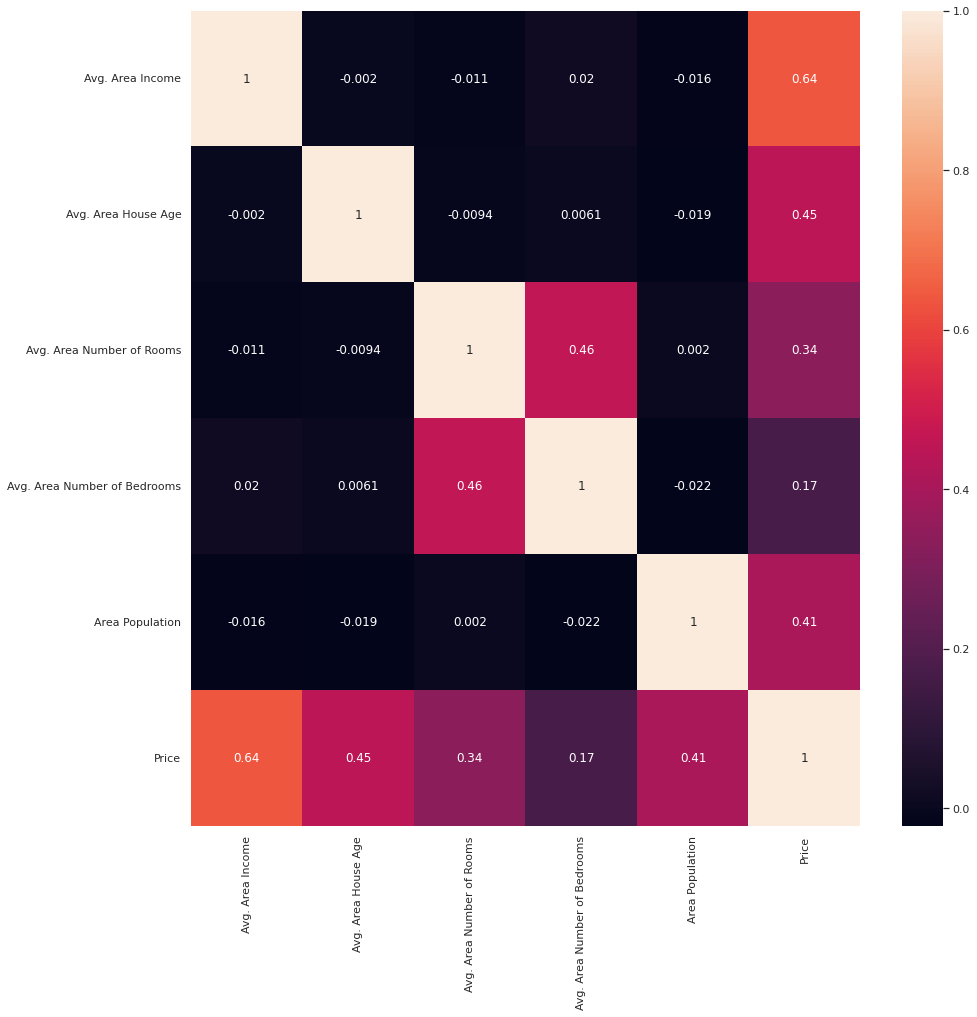

In [115]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot = True)
#> <AxesSubplot:>
plt.show()

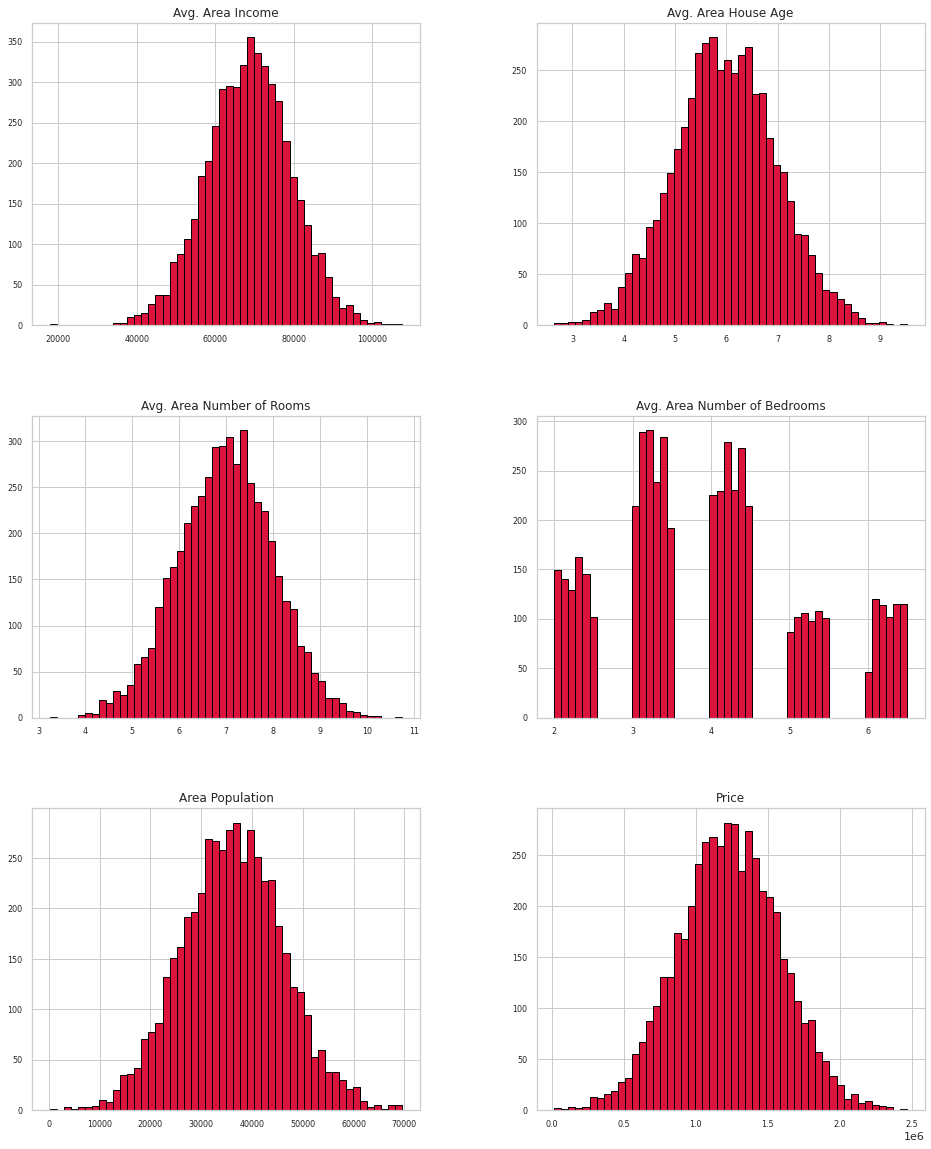

In [116]:
# Plotting the distribution of all the numerical data
fig_ = df.hist(
    figsize=(16, 20), 
    bins=50, 
    color="crimson", 
    edgecolor="black", 
    xlabelsize=8, 
    ylabelsize=8
)

##Train and Test

In [117]:
# Load Train set
df_train = pd.read_csv("/content/USA_Housing.csv")
print(f"Train set shape:\n{df_train.shape}\n")

# Load Test set
df_test = pd.read_csv("/content/USA_Housing.csv")
print(f"Test set shape:\n{df_test.shape}")

Train set shape:
(5000, 7)

Test set shape:
(5000, 7)


In [118]:
df_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [119]:
df_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [120]:
# info of each of the variables in Train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [121]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: []

Columns present in df_test set and absent in df_train: []


In [122]:
# Dropping the 'Address' column from dataset
df.drop(["Address"], axis=1, inplace=True)

In [123]:
# Dropping the 'Address' column from the train set
df_train.drop(["Address"], axis=1, inplace=True)

# Saving the list of 'Address' before dropping it from the test set
Id_test_list = df_test["Address"].tolist()
df_test.drop(["Address"], axis=1, inplace=True)

##Numerical Features

###Exploring and Cleaning Numerical Features

In [124]:
# Selecting the columns of the train set with numerical data
df_train_num = df_train.select_dtypes(exclude=["object"])
df_train_num.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [125]:
# Dropping quasi-constant features where 95% of the values are similar or constant
# sel : selector
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fitting finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1]) # all cols except 'Price'

VarianceThreshold(threshold=0.05)

In [126]:
sel.get_support()

array([ True,  True,  True,  True,  True])

In [127]:
df_train_num.iloc[:, :-1].columns[sel.get_support()]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [128]:
# Notes! 
# Sample Case
myArr = np.array([1, 2, 3, 4])
myFilter = np.array([True, True, True, False])
myArr[myFilter]

array([1, 2, 3])

In [129]:
~myFilter

array([False, False, False,  True])

In [130]:
quasi_constant_features_list = df_train_num.iloc[:, :-1].columns[~sel.get_support()].tolist()
print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")


Quasi-constant features to be dropped: []


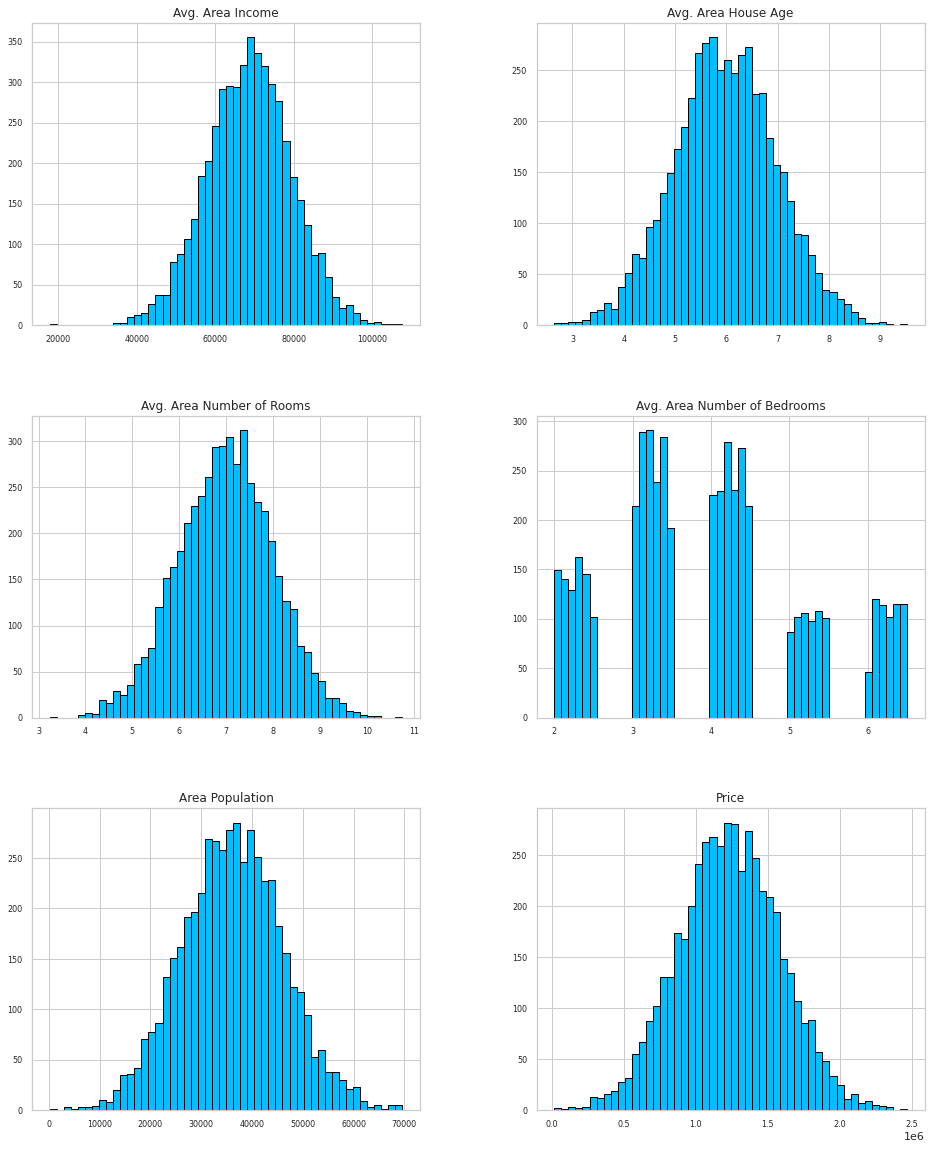

In [131]:
# Plotting the distribution of all the numerical data
fig_ = df_train_num.hist(
    figsize=(16, 20), 
    bins=50, 
    color="deepskyblue", 
    edgecolor="black", 
    xlabelsize=8, 
    ylabelsize=8
)

In [132]:
# Defining correlation matrix
corr_matrix = df_train_num.corr()
corr_matrix

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [133]:
# Replacing correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
corr_matrix

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,0.000000,0.000000,0.000000,0.000000,0.639734
Avg. Area House Age,0.000000,1.000000,0.000000,0.000000,0.000000,0.452543
Avg. Area Number of Rooms,0.000000,0.000000,1.000000,0.462695,0.000000,0.335664
Avg. Area Number of Bedrooms,0.000000,0.000000,0.462695,1.000000,0.000000,0.000000
Area Population,0.000000,0.000000,0.000000,0.000000,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.000000,0.408556,1.000000


In [134]:
# Masking the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

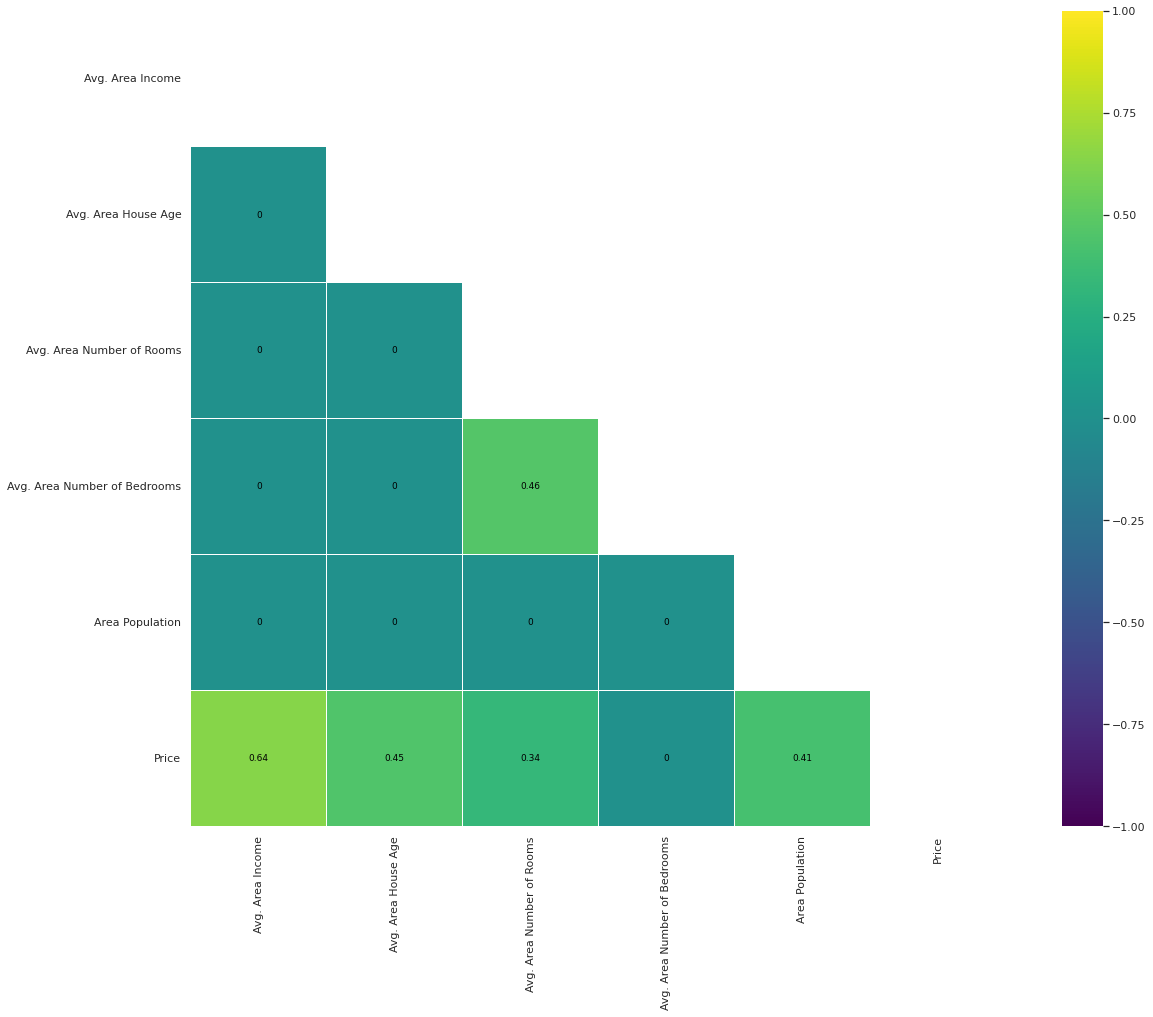

In [135]:
# Choosing the color map
cmap = "viridis"

# plotting the heatmap
sns.heatmap( 
    data = corr_matrix, 
    mask = mask, # cover, not showing them which masked True
    vmax = 1.0, 
    vmin = -1.0, 
    linewidths = 0.1,
    annot_kws = {
        "size": 9, 
        "color": "black"
    }, 
    square = True, 
    cmap = cmap, 
    annot = True
);

In [136]:
# Select features where the correlation with 'Price' is higher than |0.3|
# -1 because the latest row is Price
df_num_corr = df_train_num.corr()["Price"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = df_num_corr[abs(df_num_corr) >= 0.5].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated values with Price:\n{high_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
low_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(low_features_list)} slightly correlated values with Price:\n{low_features_list}")

1 strongly correlated values with Price:
Avg. Area Income    0.639734
Name: Price, dtype: float64

3 slightly correlated values with Price:
Avg. Area House Age          0.452543
Area Population              0.408556
Avg. Area Number of Rooms    0.335664
Name: Price, dtype: float64


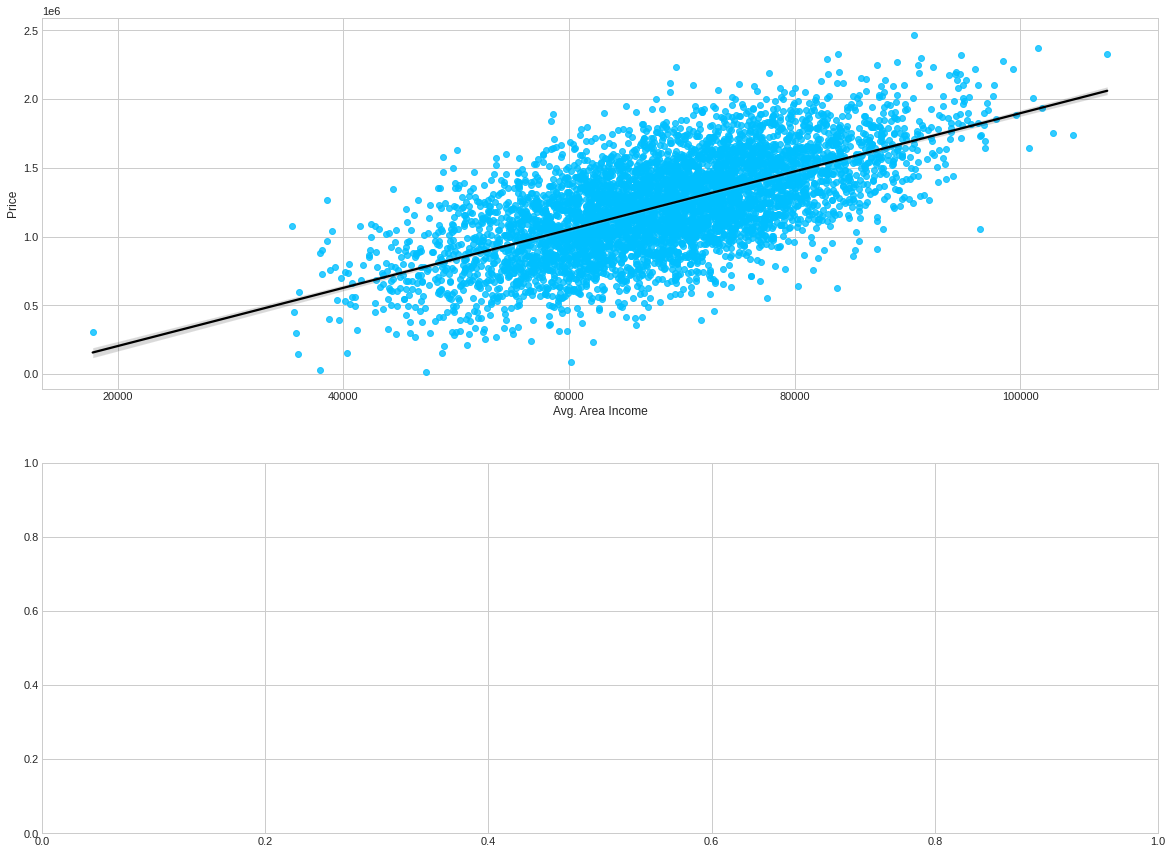

In [137]:
# Features with high correlation (higher than 0.5)
strong_features = df_num_corr[abs(df_num_corr) >= 0.5].index.tolist()
strong_features.append("Price")

df_strong_features = df_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 1), 1)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with Price
    if i < len(strong_features)-1:
        sns.regplot(
            x=strong_features[i], 
            y="Price", 
            data=df_strong_features, 
            ax=ax, 
            scatter_kws= {"color": "deepskyblue"}, 
            line_kws={"color": "black"}
        )

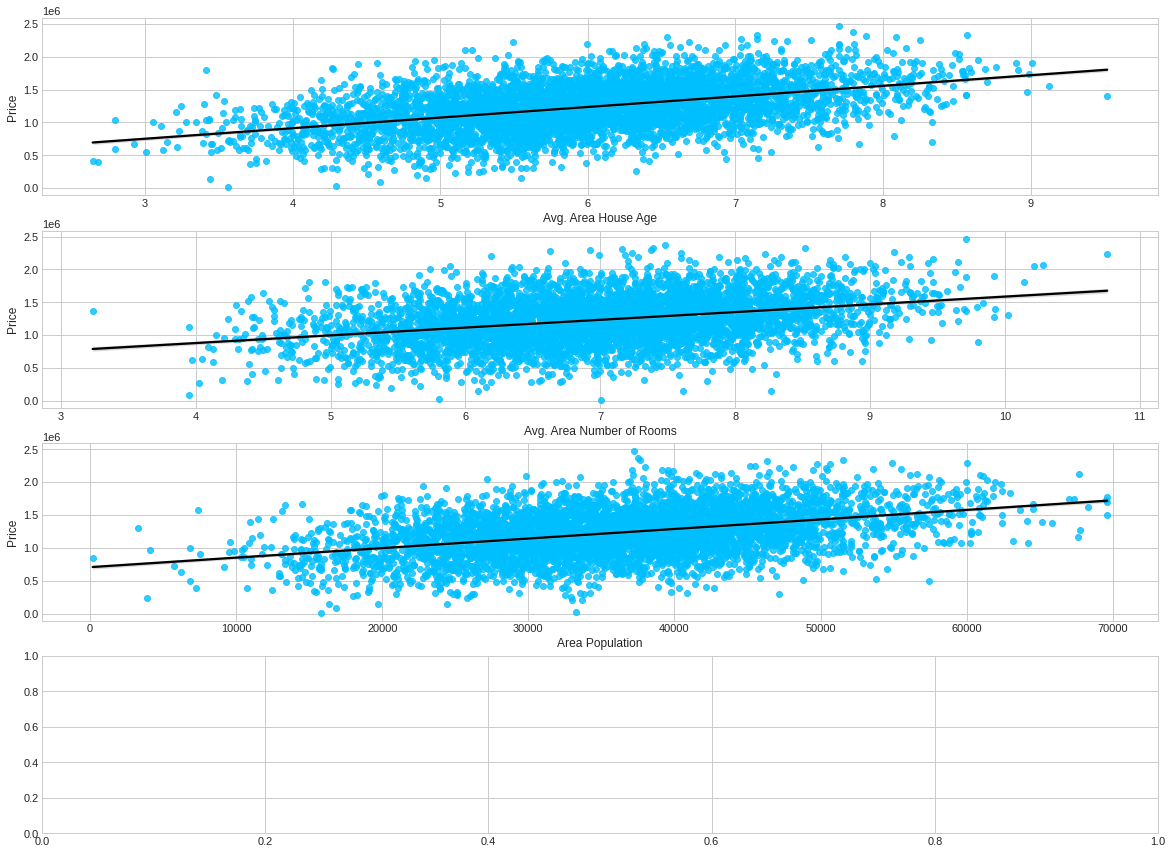

In [138]:
#  Features with low correlation (between 0.3 and 0.5)
low_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (abs(df_num_corr) < 0.5)].index.tolist()
low_features.append("Price")

df_low_features = df_train_num.loc[:, low_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(low_features) / 1), 1)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(low_features) - 1:
        sns.regplot(
            x=low_features[i], 
            y="Price", 
            data=df_low_features, 
            ax=ax, 
            scatter_kws={"color": "deepskyblue"}, 
            line_kws={"color": "black"}
        )

In [139]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + low_features

# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except "Price")
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

In [140]:
list_of_numerical_features

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Area Population',
 'Price']

In [141]:
# Drop the 'Avg. Area Number of Bedrooms' column from the train set
df_train.drop(["Avg. Area Number of Bedrooms"], axis=1, inplace=True)

# Save the list of 'Avg. Area Number of Bedrooms' before dropping it from the test set
Id_test_list = df_test["Avg. Area Number of Bedrooms"].tolist()
df_test.drop(["Avg. Area Number of Bedrooms"], axis=1, inplace=True)

##Preparing for Modeling

In [142]:
data_fe= df.copy()

In [143]:
#Drop Unnecessary columns
data_fe.drop(["Avg. Area Number of Bedrooms"], 
                    axis=1, inplace=True)

In [144]:
data_fe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06


In [145]:
a = data_fe.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, data_fe[i].nunique())
    cat_list.append(i)

In [146]:
# minMax Scaling Continuous Variables

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(data_fe)
data_fe = pd.DataFrame(mm.transform(data_fe), columns=data_fe.columns)

data_fe.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.376988,0.250702


### Targeting Feature, Splitting and Standardizing Data

In [147]:
# Extract the features (X) and the target (y)
# Features (X)
X = df_train[[i for i in list(
    df_train.columns) if i != "Price"]]
print(X.shape)

# Target (y)
y = df_train.loc[:, "Price"]
print(y.shape)

(5000, 4)
(5000,)


In [148]:
# Split into X_train and X_test (by stratifying on y)
# Stratify on a continuous variable by splitting it in bins
# Create the bins.
bins = np.linspace(0, len(y), 150)
y_binned = np.digitize(y, bins)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y_binned, shuffle=True)
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(4000, 4)
y_train:(4000,)

X_test:(1000, 4)
y_test:(1000,)


In [149]:
# Standardizing the data
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [150]:
df_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06


In [151]:
df_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06


In [152]:
#Checking Multicollinearity
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
X_variables = df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms', 'Area Population']]
y_variables = df[['Price']]

In [153]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [154]:
print(vif_data)

                     feature        VIF
0           Avg. Area Income  29.632060
1        Avg. Area House Age  27.446757
2  Avg. Area Number of Rooms  32.156187
3            Area Population  12.813187


Looks like every predictor has > 10 Multicollinearity

##Fitting Model

In [155]:
# Fitting Models
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [156]:
target_column = ['Price'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,0.636787,0.627920,0.649448,0.612512,0.519429,1.232073e+06
std,0.098958,0.104155,0.093483,0.189867,0.142565,3.531176e+05
min,0.165240,0.277790,0.300773,0.307692,0.002479,1.593866e+04
25%,0.570841,0.559117,0.585455,0.483077,0.422338,9.975771e+05
50%,0.638841,0.627206,0.650852,0.623077,0.519944,1.232669e+06
75%,0.703641,0.698681,0.712469,0.690769,0.615631,1.471210e+06
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.469066e+06


In [157]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)
print(X_train.shape); print(X_test.shape)

(2500, 5)
(2500, 5)


###Principal Component Regression and Partial Least Squares

Because data suffers Multicollinearity, we shall run PCR and PLS and compare which one yields the best R-squared.

In [158]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import make_pipeline

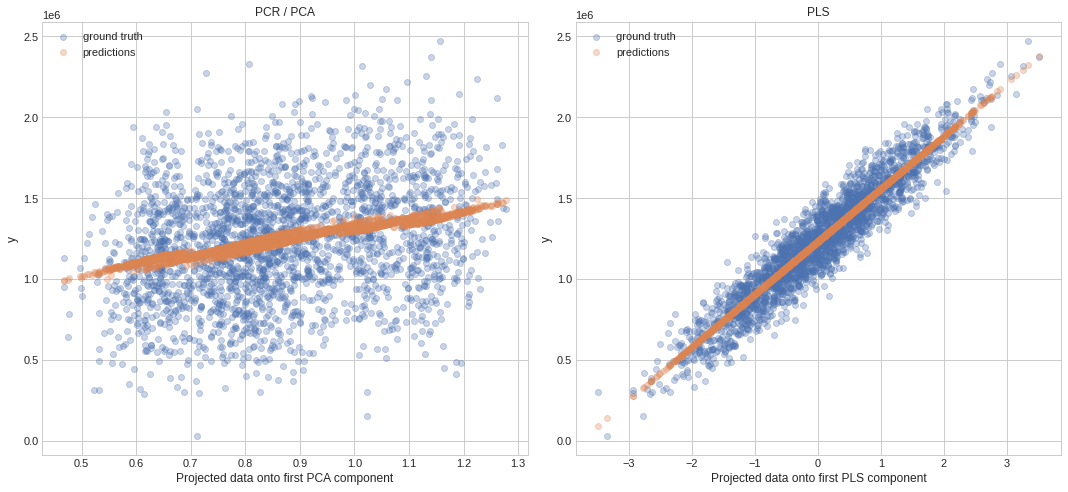

In [159]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [160]:
print(f"PCR R² {pcr.score(X_test, y_test):.3f}")
print(f"PLS R² {pls.score(X_test, y_test):.3f}")

PCR R² 0.079
PLS R² 0.895


In [161]:
print(f"PCR R² {pcr.score(X_test, y_test):.3f}")
print(f"PLS R² {pls.score(X_test, y_test):.3f}")

PCR R² 0.079
PLS R² 0.895


The PLS model results in better R-squared. This may due to the fact that PLS tends to extract more components than PCR so it goes to find latent relationship between X and Y. 

####Defining Metrics Function and Regression Models

In [162]:
# Defining function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculating R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculating Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [163]:
# Defining regression models
lr = LinearRegression()
rr = Ridge()
lasso = Lasso(alpha=0.001)
elastic = ElasticNet(alpha=0.001)
xgboost = XGBRegressor()
lgbm = LGBMRegressor()

# Training models on X_train and y_train
for regr in [lr, rr, lasso, elastic, xgboost, lgbm]:
    # fitting the corresponding model
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    # Printting the defined metrics above for each classifier
    print_score(y_test, y_pred)

- Regressor: LinearRegression
R²: 0.921258545272281
RMSE: 100292.63369857435

- Regressor: Ridge
R²: 0.9199196943223776
RMSE: 101141.68397451345

- Regressor: Lasso
R²: 0.9212585453101532
RMSE: 100292.63367445559

- Regressor: ElasticNet
R²: 0.9191837180936443
RMSE: 101605.39116224674

[12:06:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- Regressor: XGBRegressor
R²: 0.9045957425361633
RMSE: 110395.45580990503

- Regressor: LGBMRegressor
R²: 0.8964441887905316
RMSE: 115015.01929794885



###Hyperparameter Tuning and Optimization

####Linear Regression

We do not tune LR as we do other Regression models

####Ridge Regression

In [164]:

from sklearn.model_selection import GridSearchCV

# Defining hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(Ridge(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fitting the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# ing best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 0.04714866363457394}
Best R² (train): 0.9131299265134796


In [165]:
# Ridge Regressor with the best hyperparameters
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])

# ting the model on train set
ridge_mod.fit(X_train, y_train)

# Predicting on test set
y_pred = ridge_mod.predict(X_test)

print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Ridge
R²: 0.9212599659561767
RMSE: 100291.72893517667


In [166]:
# Saving the model results into lists
model_list = []
r2_list = []
rmse_list = []

model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

####Lasso Regression

In [167]:
# Defining hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(Lasso(), tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fitting the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# printing best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 33.9322177189533}
Best R² (train): 0.9131290644418903


In [168]:
# Lasso Regressor with the best hyperparameters
lasso_mod = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fitting the model on train set
lasso_mod.fit(X_train, y_train)

# Predicting on test set
y_pred = lasso_mod.predict(X_test)

print(f"- {lasso_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- Lasso
R²: 0.9212558422662422
RMSE: 100294.35508706683


In [169]:
# Saving the model results into lists
model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

####XGBoost Regression

In [170]:
# Defining hyperparameters
tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fitting the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# printing best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[12:06:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.8986456133024424


In [171]:
# XGB Regressor with the best hyperparameters
xgbr_mod = XGBRegressor(seed=20,
                        colsample_bytree=xgbr_cv.best_params_["colsample_bytree"],
                        learning_rate=xgbr_cv.best_params_["learning_rate"],
                        max_depth=xgbr_cv.best_params_["max_depth"],
                        n_estimators=xgbr_cv.best_params_["n_estimators"])

# Fitting the model on train set
xgbr_mod.fit(X_train, y_train)

# Predicting on test set
y_pred = xgbr_mod.predict(X_test)

print(f"- {xgbr_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

[12:06:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
- XGBRegressor
R²: 0.9091364336012698
RMSE: 107736.33773095


In [172]:
# Saving the model results into lists
model_list.append(xgbr_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

####LightGBM Reegression

In [173]:
# Defining hyperparameters
tuned_parameters = {"max_depth": [3, 6, 10], "learning_rate": [
    0.01, 0.05, 0.1], "n_estimators": [100, 500, 1000], }

# GridSearch
lgbm_cv = GridSearchCV(estimator=LGBMRegressor(
), param_grid=tuned_parameters, cv=10, n_jobs=-1, verbose=1)

# fitting the GridSearch on train set
lgbm_cv.fit(X_train, y_train)

# printing best params and the corresponding R²
print(f"Best hyperparameters: {lgbm_cv.best_params_}\n")
print(f"Best R²: {lgbm_cv.best_score_}")

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}

Best R²: 0.8971560341862219


In [174]:
# LGBM Regressor with the best hyperparameters
lgbm_mod = LGBMRegressor(learning_rate=lgbm_cv.best_params_["learning_rate"],
                         max_depth=lgbm_cv.best_params_["max_depth"],
                         n_estimators=lgbm_cv.best_params_["n_estimators"])

# Fitting the model on train set
lgbm_mod.fit(X_train, y_train)

# Predicting on test set
y_pred = lgbm_mod.predict(X_test)

print(f"- {lgbm_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred)}")
print(f"RMSE: {rmse_score(y_test, y_pred)}")

- LGBMRegressor
R²: 0.9060135691864569
RMSE: 109572.0779442705


In [175]:
# Saving the model results into lists
model_list.append(lgbm_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

####ElasticNet Regression

In [176]:
# Defining hyperparameters
alphas = np.logspace(-5, 5, 50).tolist()

tuned_parameters = {"alpha": alphas}

# GridSearch
elastic_cv = GridSearchCV(ElasticNet(), tuned_parameters, cv=4, n_jobs=-1, verbose=1)

# fitting the GridSearch on train set
elastic_cv.fit(X_train, y_train)

# printing best params and the corresponding R²
print(f"Best hyperparameters: {elastic_cv.best_params_}")
print(f"Best R² (train): {elastic_cv.best_score_}")

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best hyperparameters: {'alpha': 2.559547922699533e-05}
Best R² (train): 0.913775943760003


In [177]:
# ElasticNet Regressor with the best hyperparameters
elastic_mod = ElasticNet(alpha=lasso_cv.best_params_["alpha"])

# Fitting the model onto train set
elastic_mod.fit(X_train, y_train)

# Predicting on test set
y_pred = elastic_mod.predict(X_test)

print(f"- {elastic_mod.__class__.__name__}")
print(f"R² (test): {rsqr_score(y_test, y_pred)}")
print(f"RMSE (test): {rmse_score(y_test, y_pred)}")

- ElasticNet
R² (test): 0.001318769845827128
RMSE (test): 357174.76105661684


In [178]:
# Saving the model results into lists
model_list.append(elastic_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

###Reviewing The Best Model

In [179]:
# Creating a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

,Model,R²,RMSE
0,Ridge,0.9213,100291.7289
1,Lasso,0.9213,100294.3551
2,XGBRegressor,0.9091,107736.3377
3,LGBMRegressor,0.9060,109572.0779
4,ElasticNet,0.0013,357174.7611


##Prediction on House Prices

We choose Ridge Regression model since it yields the best R-squared regardless PLS nearly did prior to the Regression fittings. And not Lasso Regression, either albeit it's equal R-squared, due to multicollinearity issue.

In [180]:
# Predictions from Ridge model

ridge_mod.fit(X_train, y_train)

Ridge(alpha=0.04714866363457394)

In [181]:
y_pred = ridge_mod.predict(X_test)

y_pred

array([[ 970550.48669223],
       [ 954846.29309833],
       [ 909545.54548191],
       ...,
       [1406629.88798101],
       [1204446.69882401],
       [1253067.28110073]])

In [182]:
print(ridge_mod.score(X_train, y_train))

0.9145718343389937


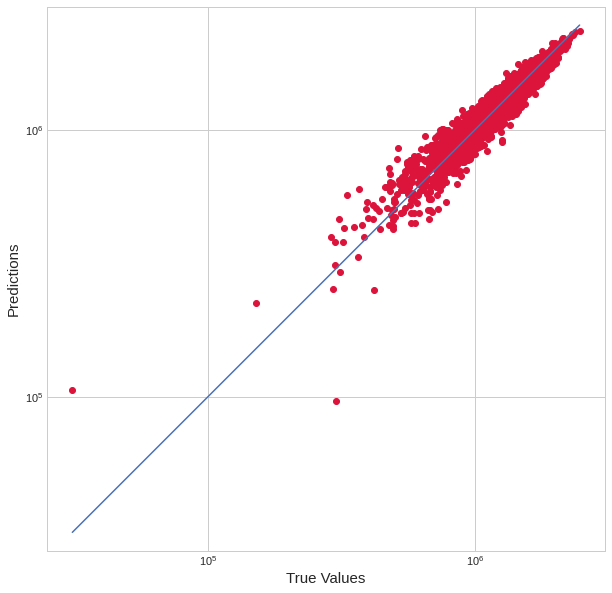

In [183]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [197]:
comparison = ({'Actual' : y_test, 'Predicted' : y_pred})
pd.DataFrame([comparison])

,Actual,Predicted
0,"[[894251.0686357756], [932979.360621325], [920...","[[970550.4866922349], [954846.2930983277], [90..."
